<a href="https://colab.research.google.com/github/Bishu-21/PRODIGY_ML_02/blob/main/ProdigyInfoTech_ML_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Effortlessly Import Datasets with Opendatasets**

In [7]:
!pip install opendatasets

#**Comprehensive Setup for Data Analysis**


In [8]:
import opendatasets as od
# Importing libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
# Setting the style for seaborn plots
sns.set(style='darkgrid')
# Importing sklearn modules for clustering, scaling, encoding, dimensionality reduction, and evaluation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

#**Downloading Dataset for Customer Segmentation**

In [9]:
od.download('https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data')

Skipping, found downloaded files in "./customer-segmentation-tutorial-in-python" (use force=True to force download)


#**Loading and Previewing Customer Data**

In [10]:
file=('/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data=pd.read_csv(file)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**Viewing the Last Rows of Data**

In [11]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#**Checking Dataset Dimensions (Rows, Columns)**

In [12]:
data.shape

(200, 5)

#**Displaying Dataset Structure and Types**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#**Summary Statistics of the Dataset**

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#**Summary of Categorical Data**

In [15]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


#**Selecting Numerical Columns from Dataset**

In [16]:
numerical_col=data.select_dtypes(include=np.number).columns.to_list()

#**Dropping CustomerID Column from Data**

In [17]:
data.drop(['CustomerID'],axis=1,inplace=True)
numerical_col.remove('CustomerID')

#**Visualizing Distribution and Box Plots**

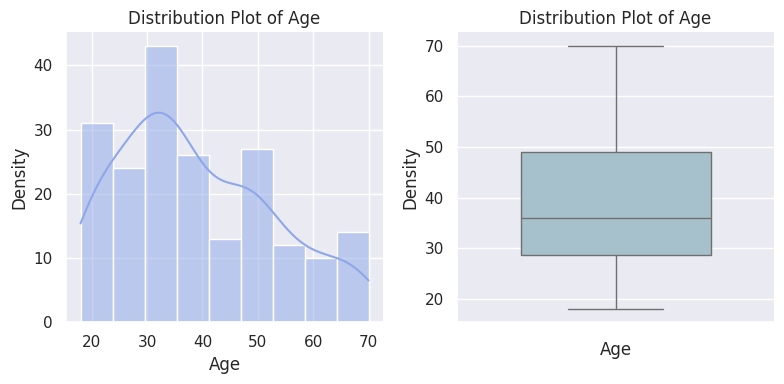

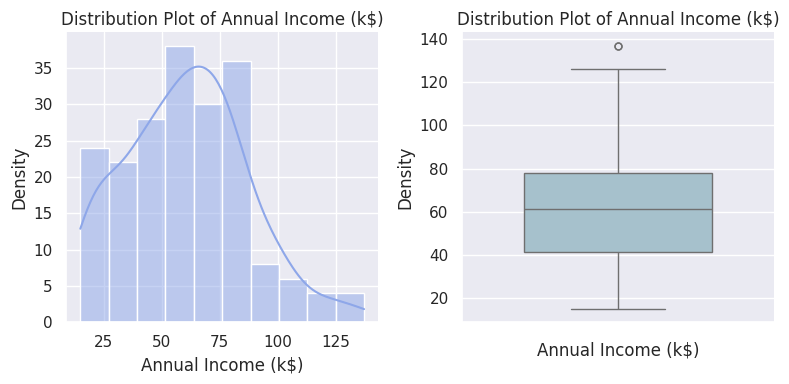

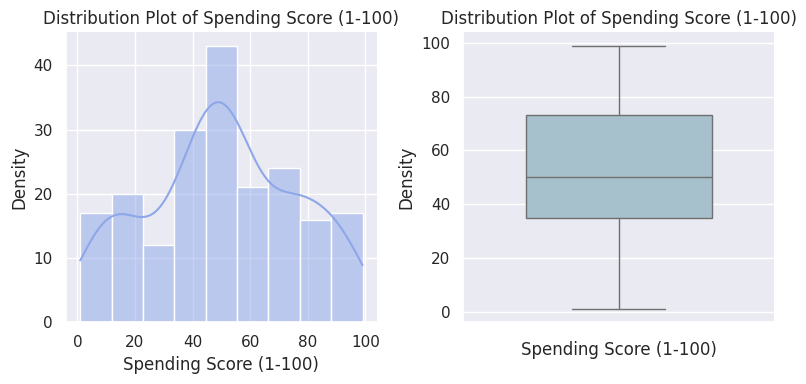

In [18]:
for i in range(len(numerical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

#**Pie Chart of Gender Distribution**

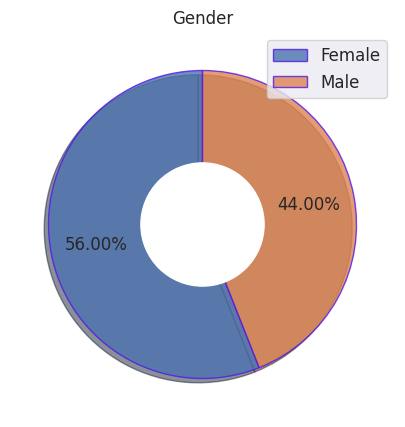

In [19]:
plt.figure(figsize=(6, 5))
plt.pie(data['Gender'].value_counts(), startangle=90,shadow=True,pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='#5217e6'),textprops={'fontsize':12})
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender')
plt.legend(['Female', 'Male'], loc='best', fontsize=12)
plt.show()

#**Kernel Density Plots by Gender**

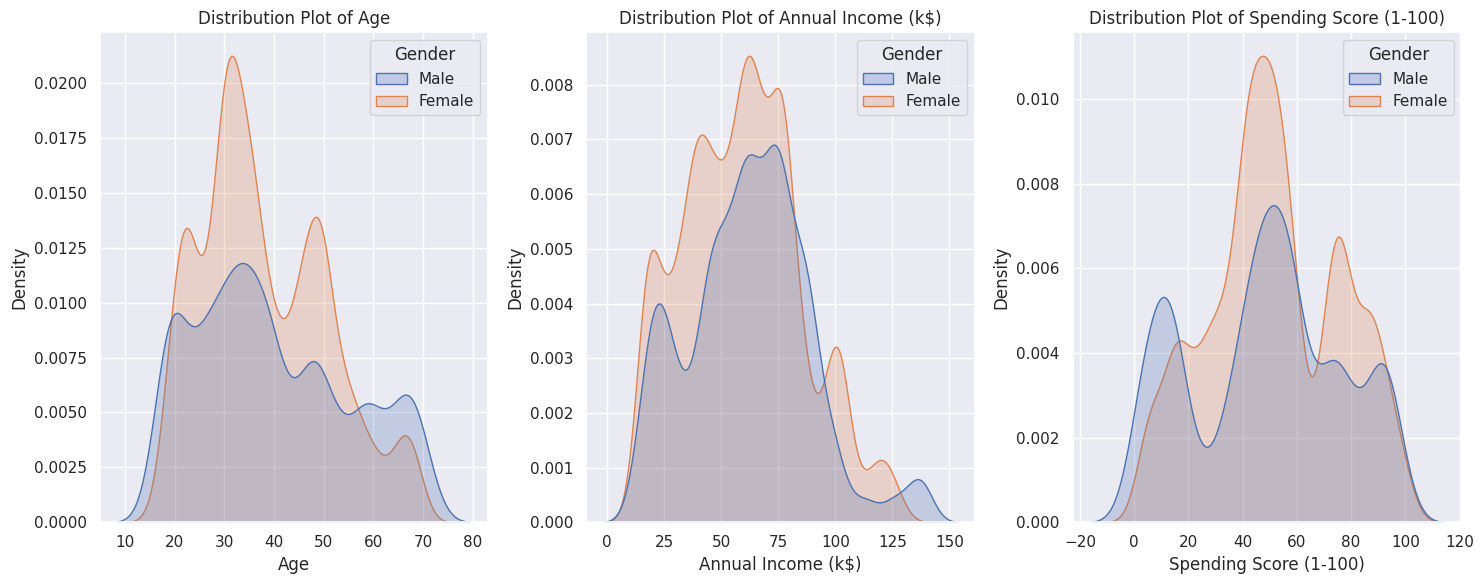

In [20]:
plt.figure(figsize=(15, 6))
for i,col in enumerate(numerical_col):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=data[col], hue=data['Gender'], shade=True, bw_adjust=.5)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
plt.show()

#**Joint and Marginal Density Plots**

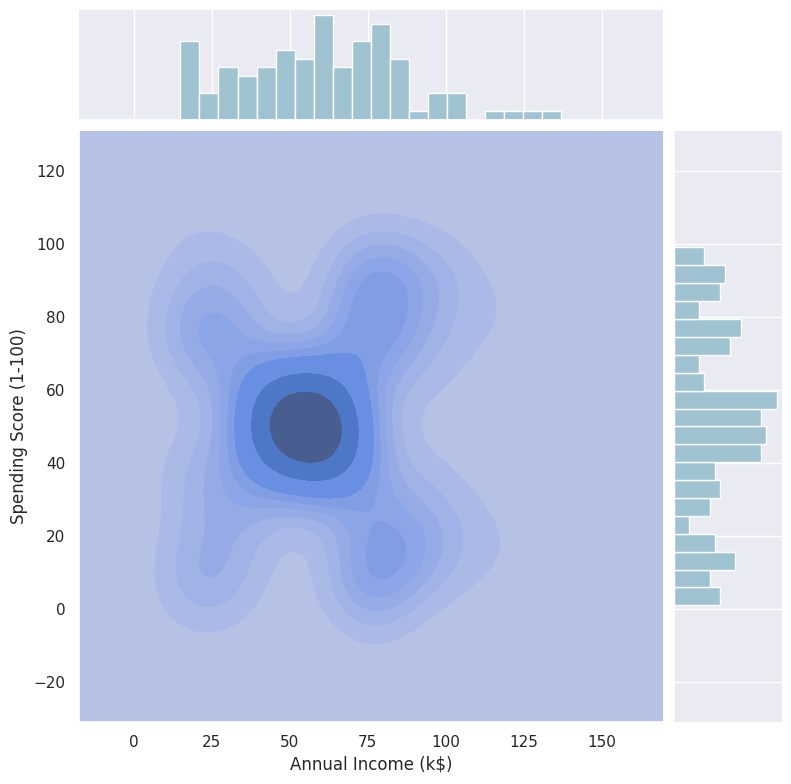

In [21]:
shap = sns.JointGrid(data = data, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
shap.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = '#8EA7E9')
shap.plot_marginals(sns.histplot, color = '#A0C3D2', alpha = 1, bins = 20);

#**Heatmap of Feature Correlations**

<Axes: >

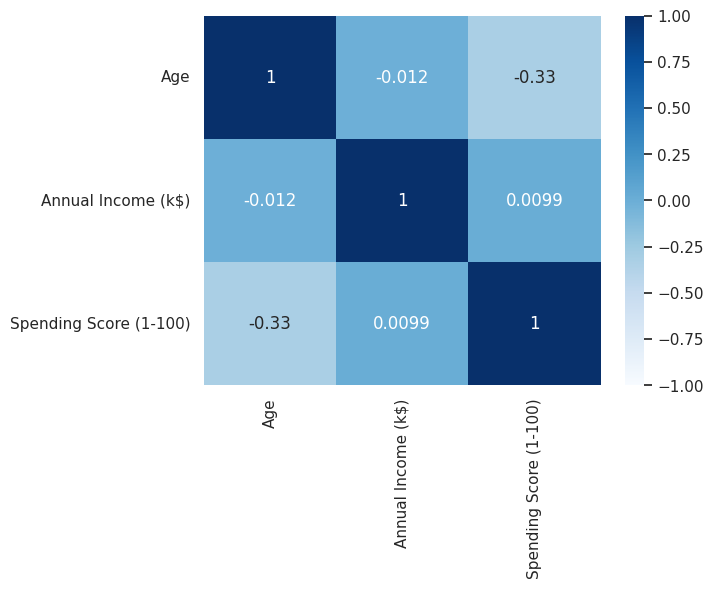

In [22]:
sns.heatmap(data[numerical_col].corr(),vmin=-1, vmax=1, annot=True,cmap='Blues')

#**Encoding Gender Labels in Dataset**

In [23]:
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


#**Selecting All Features for Analysis**

In [24]:
x_2D=data.iloc[:,:]

#**Standardizing Features with StandardScaler**

In [25]:
sc = StandardScaler()
x_2D = sc.fit_transform(x_2D)

#**Calculating WCSS for Optimal K**

In [26]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)

#**Elbow Method for Optimal Clusters**

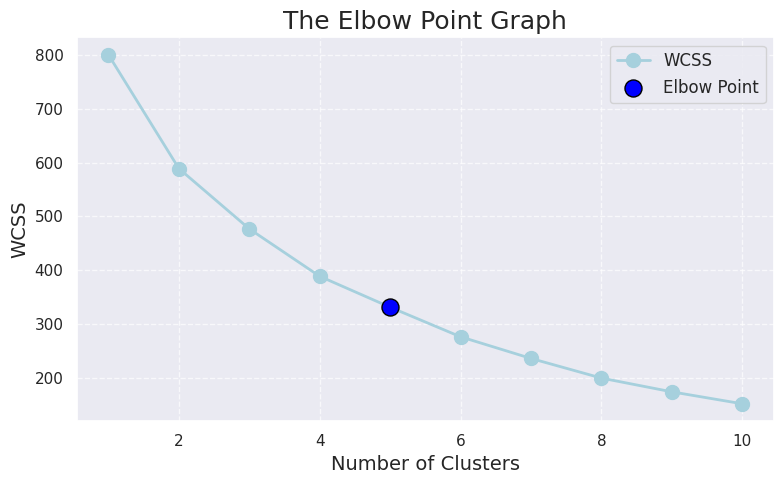

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#**Applying K-means Clustering with 5 Clusters**

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

#**Visualizing Clusters and Centroids**

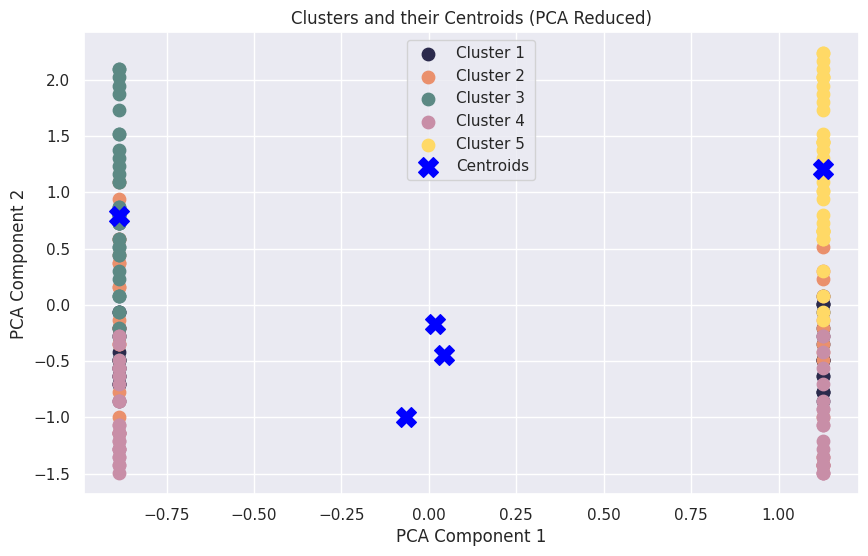

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

#**Scatter Plot of Income vs Spending Score**

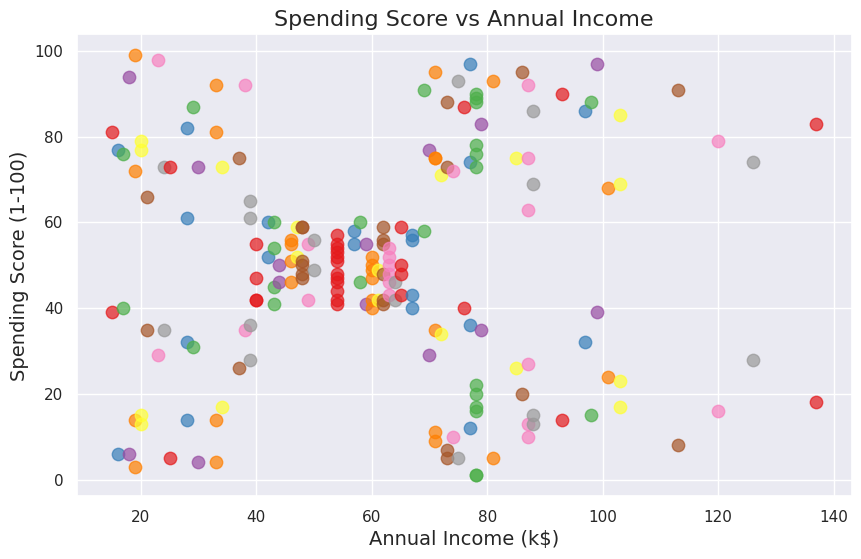

In [30]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))
for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score vs Annual Income', fontsize=16)

#**Standardizing Selected Features (Annual Income, Spending Score)**

In [31]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)

#**Calculating WCSS for K-means Clustering on Selected Features**

In [32]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)

#**Elbow Method for Optimal Clusters (Selected Features)**

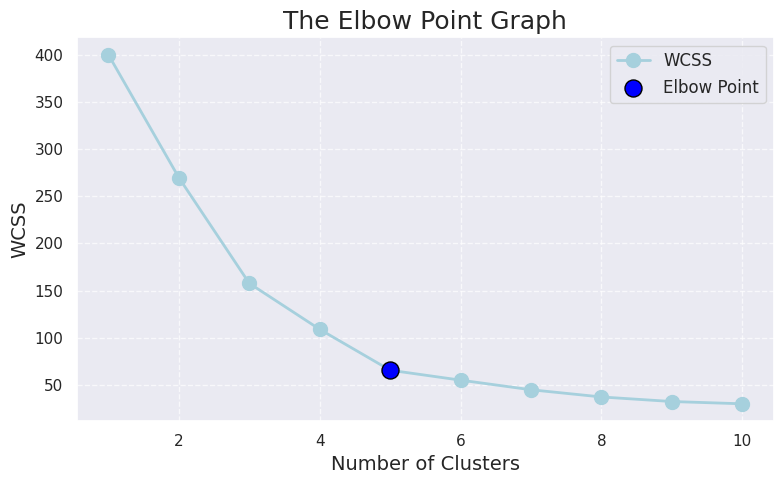

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#**Applying K-means Clustering with 5 Clusters (Selected Features)**

In [34]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

#**Visualizing Clusters and Centroids (Annual Income vs Spending Score)**

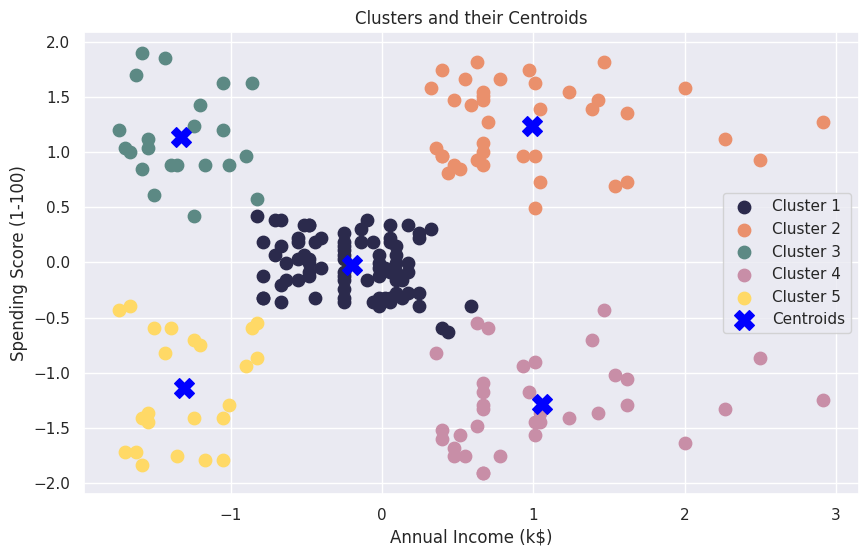

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')
plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#**Scatter Plot of Age vs Annual Income**

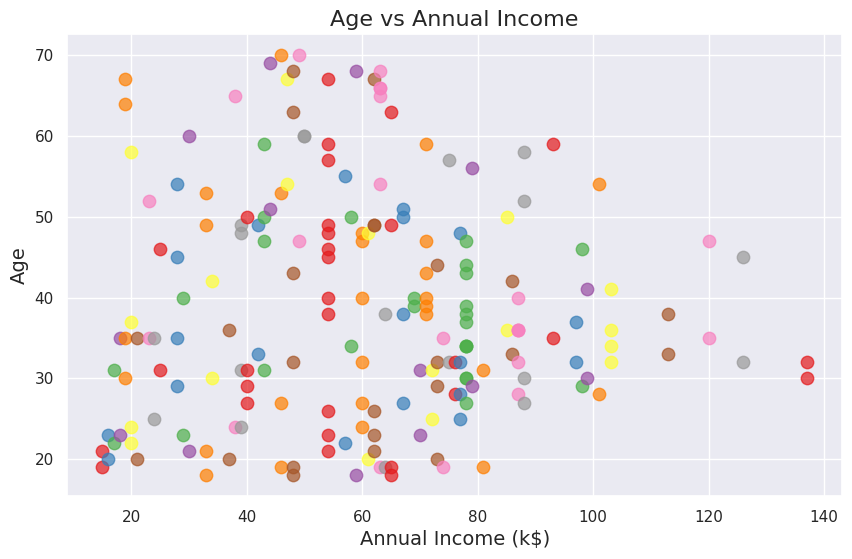

In [36]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))
for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Age'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.title('Age vs Annual Income', fontsize=16)

#**Standardizing Selected Features (Age, Annual Income)**

In [37]:
x_2D=data.iloc[:,[1,2]]
x_2D=sc.fit_transform(x_2D)

#**Calculating WCSS for K-means Clustering on Age and Annual Income**

In [38]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)

#"Optimal clusters identified at elbow"

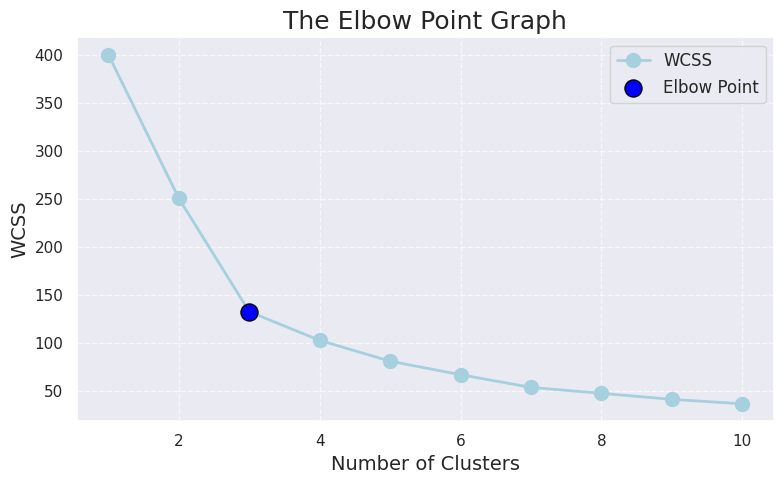

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
elbow_point = 3
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#**Applying K-means Clustering with 3 Clusters**

In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

#**Clusters and Centroids (Age vs Annual Income)**

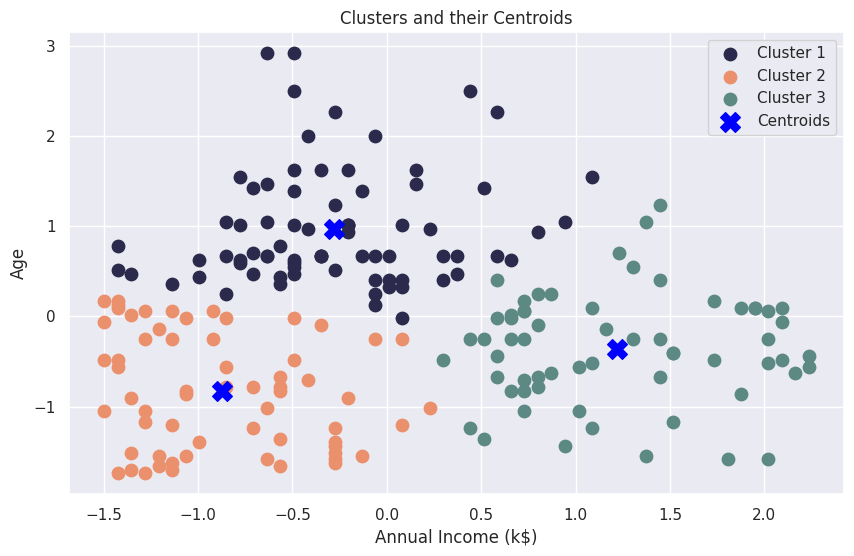

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')
plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

#**Scatter Plot of Spending Score vs Age**

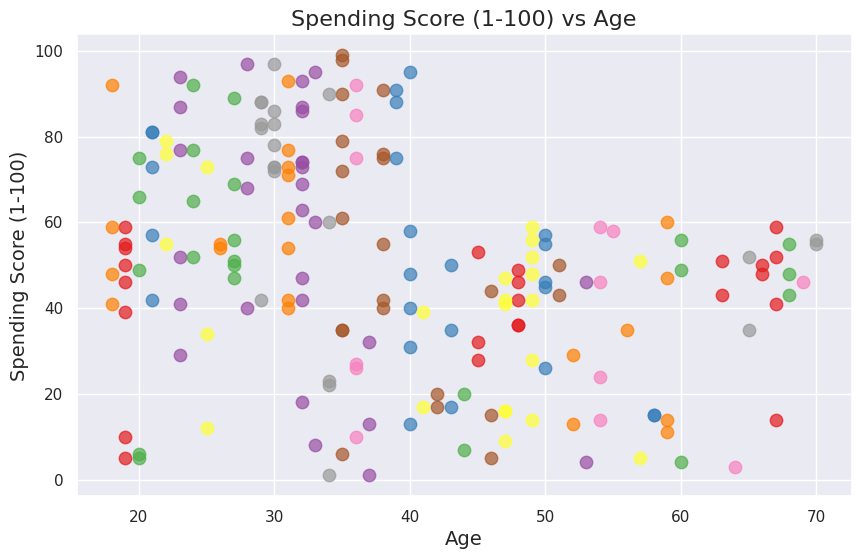

In [42]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Set1', n_colors=len(data['Age'].unique()))
for i, income in enumerate(data['Age'].unique()):
    filt = data[data['Age'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score (1-100) vs Age', fontsize=16)

#**Standardizing Selected Features (Age, Spending Score)**

In [43]:
x_2D=data.iloc[:,[1,3]]
x_2D=sc.fit_transform(x_2D)

#**WCSS Calculation for Optimal Cluster Selection**

In [44]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)

#**Elbow Method Graph for Optimal Clusters**

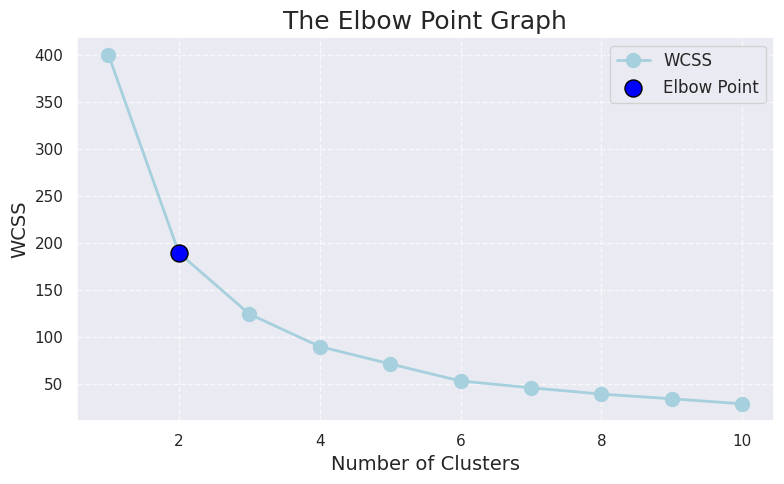

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
elbow_point = 2
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#**Clustering data with 4 identified clusters.**

In [46]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

#**Visualizing four clusters and centroids graph.**

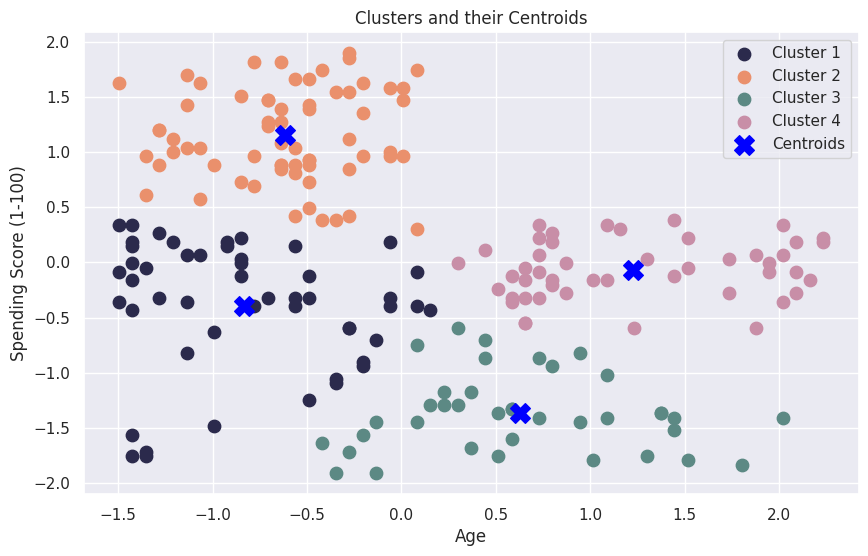

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')
plt.title('Clusters and their Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#**Clustering based on income and spending score.**

In [48]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

#**Cluster distribution based on count analysis.**

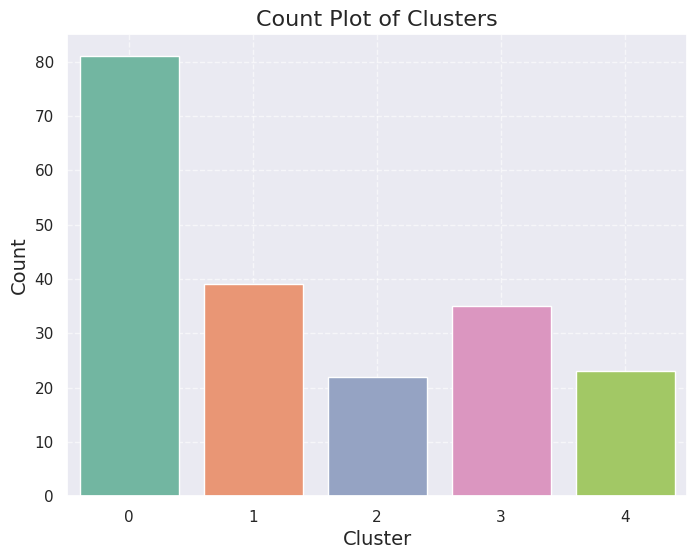

In [49]:
cluster_labels = pd.Series(y, name='Cluster')
plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_labels, palette='Set2')
plt.title('Count Plot of Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()